In [ ]:
PROVIDE_OWN_INPUT = False

In [ ]:
from google.colab import files
files.upload()

Saving dataset2.csv to dataset2.csv


{'dataset2.csv': b'Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),OCF,PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,5139.5,42.22,19.73,45.95,25.44,1.28,3.69,299.16,252.51,1.18,11.7,48.57,6.03,0.46\r\n3M India Ltd.,2382.82,27.09,16,40.33,60.43,3.67,0.04,52.65,98.81,0.53,0,14.8,22.44,3.56\r\nABB India Ltd.,12574.22,5.65,1.91,5.23,11.19,2.33,0,220.68,63.23,3.49,67.03,13.22,52.96,2.73\r\nAbbott India Ltd.,2073.75,20.22,11.68,42.25,65.3,2.59,0,46.06,60.94,0.76,38.15,24.41,11.85,1.84\r\nAccelya Solutions India Ltd.,442.18,41.03,19.22,31.87,36.9,2.59,0.02,26.36,20.94,1.26,15.16,17.64,3.81,1.1\r\nAegis Logistics Ltd.,3622.23,9.81,5.2,40.69,40.65,7.77,0.89,2.75,46.69,0.06,28.61,11.22,12.46,1.8\r\nAGC Networks Ltd.,2590.4,73.49,41.83,78.3,119.78,8.29,0,18.7,26.4,0.71,24.2,20.87,3.31,0.62\r\nAgro Tech Foods Ltd.,1441.41,9.61,8.83,38.77,57.84,5.38,0,-42.38,31.82,-1.33,13.4,24.3,17.59,1.12\r\nAkzo Nobel 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('dataset2.csv')

In [ ]:
data.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),OCF,PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,5139.50,42.22,19.73,45.95,25.44,1.28,3.69,299.16,252.51,1.18,11.70,48.57,6.03,0.46
1,3M India Ltd.,2382.82,27.09,16.00,40.33,60.43,3.67,0.04,52.65,98.81,0.53,0.00,14.80,22.44,3.56
2,ABB India Ltd.,12574.22,5.65,1.91,5.23,11.19,2.33,0.00,220.68,63.23,3.49,67.03,13.22,52.96,2.73
3,Abbott India Ltd.,2073.75,20.22,11.68,42.25,65.30,2.59,0.00,46.06,60.94,0.76,38.15,24.41,11.85,1.84
4,Accelya Solutions India Ltd.,442.18,41.03,19.22,31.87,36.90,2.59,0.02,26.36,20.94,1.26,15.16,17.64,3.81,1.10


In [ ]:
data.shape

(160, 15)

In [ ]:
test = data.iloc[:,:]

In [ ]:
data = data.replace( ' -   ', np.nan)

In [ ]:
data['Net Sales'] = data['Net Sales'].astype('float64')

In [ ]:
data.dtypes

Company Name                     object
Net Sales                       float64
PBIDTM (%)                      float64
PATM (%)                        float64
ROE (%)                         float64
ROCE (%)                        float64
Asset Turnover(x)               float64
Total Debt/Equity(x)            float64
OCF                             float64
PAT                             float64
OCF/PAT                         float64
FR_Dividend Pay Out Ratio(%)    float64
Free Float                      float64
Ev/EBITDA                       float64
M/Sales                         float64
dtype: object

In [ ]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [ ]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
len(data.columns)

15

# **Ev/EBITDA Prediction**

In [ ]:
data1 = data.iloc[:,:-1 ]

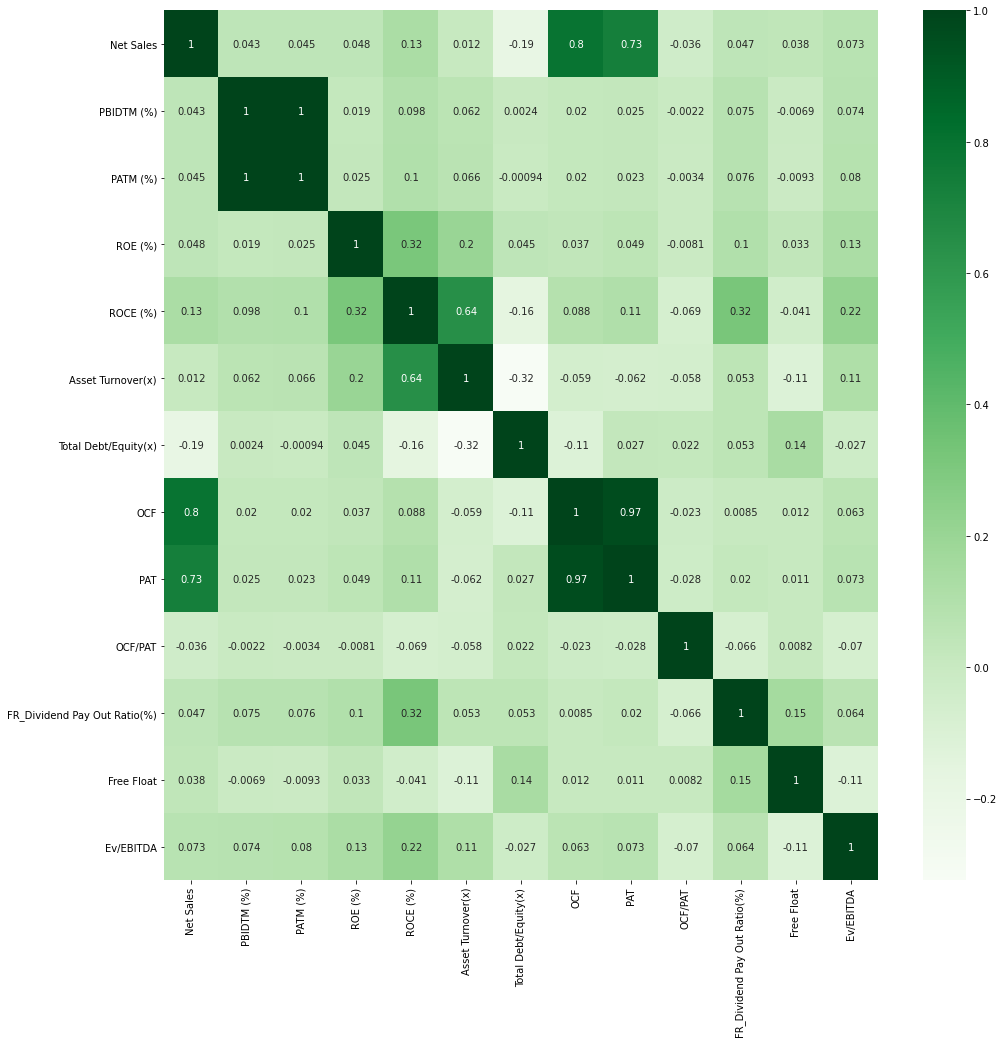

In [ ]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

## Selecting most important features:

In [ ]:
cor_target = abs(cor["Ev/EBITDA"])
relevant_features = cor_target[cor_target>0.075]
relevant_features.index

Index(['PATM (%)', 'ROE (%)', 'ROCE (%)', 'Asset Turnover(x)', 'Free Float',
       'Ev/EBITDA'],
      dtype='object')

In [ ]:
X,y = data1[['PATM (%)', 'ROE (%)', 'ROCE (%)', 'Asset Turnover(x)', 'Free Float']], data1['Ev/EBITDA']

In [ ]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

In [ ]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

 0 LassoCV                 53.4016584025
 1 XGBRegressor            149.9937703486
 2 RidgeCV                 35.8654414098
 3 BayesianRidge           53.0449825060
 4 ARDRegression           39.7119922521
 5 ElasticNetCV            53.4050750616
 6 LassoLarsCV             54.4229054749
 7 SVR                     51.6017880836


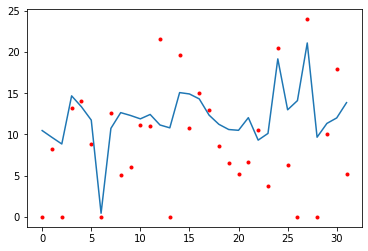

In [ ]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[2])


# **M/Sales Prediction**

In [ ]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [ ]:
data2.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),OCF,PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,M/Sales
0,3I Infotech Ltd.,5139.50,42.22,19.73,45.95,25.44,1.28,3.69,299.16,252.51,1.18,11.70,48.57,0.46
1,3M India Ltd.,2382.82,27.09,16.00,40.33,60.43,3.67,0.04,52.65,98.81,0.53,0.00,14.80,3.56
2,ABB India Ltd.,12574.22,5.65,1.91,5.23,11.19,2.33,0.00,220.68,63.23,3.49,67.03,13.22,2.73
3,Abbott India Ltd.,2073.75,20.22,11.68,42.25,65.30,2.59,0.00,46.06,60.94,0.76,38.15,24.41,1.84
4,Accelya Solutions India Ltd.,442.18,41.03,19.22,31.87,36.90,2.59,0.02,26.36,20.94,1.26,15.16,17.64,1.10


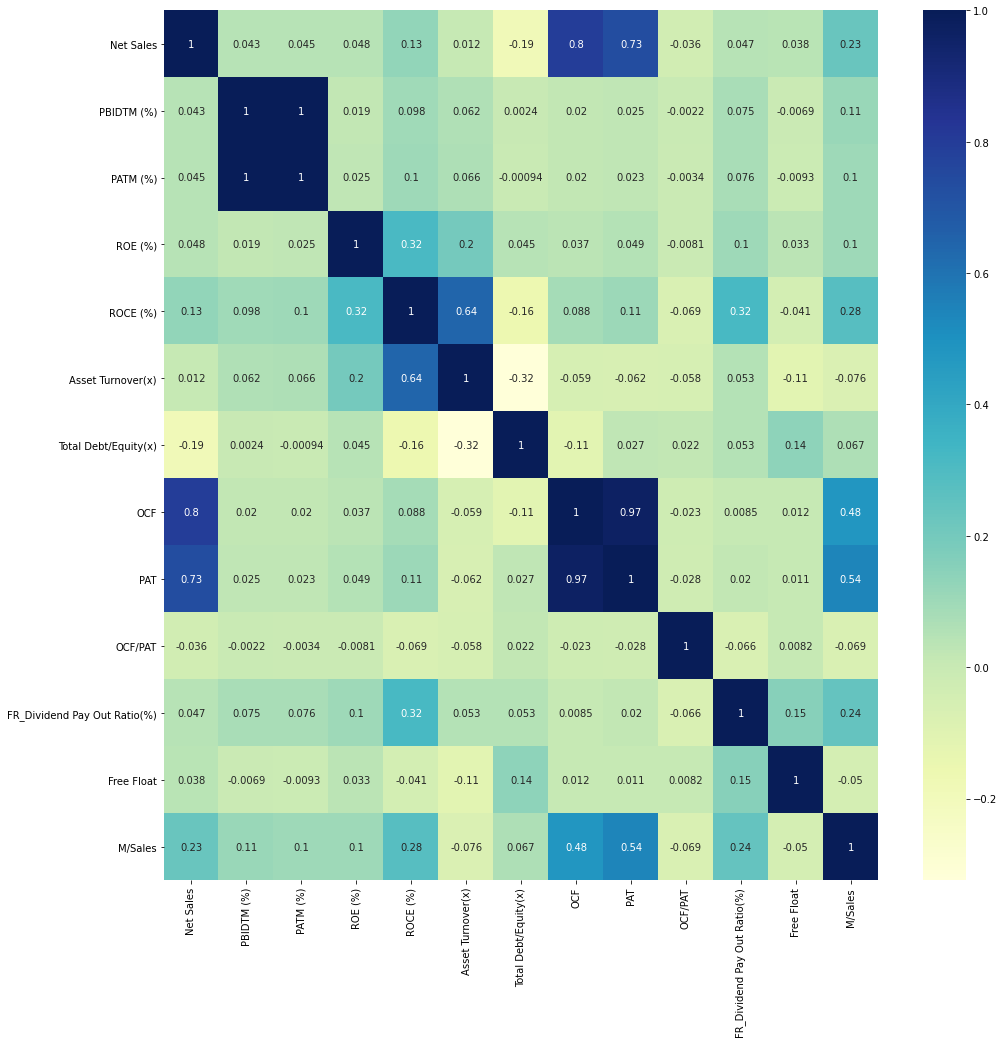

In [ ]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
cor_target = abs(cor["M/Sales"])
relevant_features = cor_target[cor_target>0.13]
relevant_features.index

Index(['Net Sales', 'ROCE (%)', 'OCF', 'PAT', 'FR_Dividend Pay Out Ratio(%)',
       'M/Sales'],
      dtype='object')

In [ ]:
X,y = data2[['Net Sales', 'ROCE (%)', 'OCF', 'PAT', 'FR_Dividend Pay Out Ratio(%)']], data2['M/Sales']

In [ ]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [ ]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

In [ ]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 1.50334
 1 XGBRegressor            1.43691
 2 RidgeCV                 1.40232
 3 BayesianRidge           1.43902
 4 ARDRegression           1.40556
 5 ElasticNetCV            1.58063
 6 LassoLarsCV             1.44783
 7 SVR                     1.53132


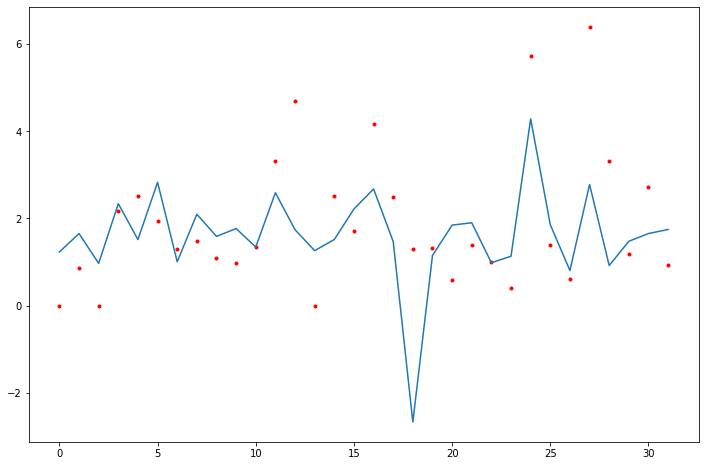

In [ ]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[2])
